# Analyze Fire Incidents Data in Pittsburgh

Introduction:
This personal notebook is to find out which neighborhood has the most frequent fire incidents/acres. I will start by finding the neighborhoods that appear the most times in the chart. Then, I will combine another datasets with area. I will divide the frequency by the area (in acres) to get a ratio for final comparision. 

Metric (only for my personal notebook):
The metric I use is the ratio of frequency of fire incidents/acres(neighborhood area), the neighborhood with the highest ratio is the worst neighborhood, the lowest ratio means the best neighborhood (according to fire incidents data).

### 1.Import all the datasets I will have to use

In [2]:
## import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from geopandas import GeoDataFrame
fire_incident = pd.read_csv('pittsburgh_fire_incidents.csv')
neighborhood_area = pd.read_csv('neighborhoods.csv')

### 2.In the next step, I'm going to start by sorting it simply by numbers of occurance of the neighborhood in the fire incidents data sets (without area data applied)

In [3]:
fire_incident['neighborhood'].value_counts()

Carrick                      255
Central Business District    225
Squirrel Hill South          225
South Side Flats             219
Hazelwood                    213
                            ... 
St. Clair                     11
Mt. Oliver                    10
East Carnegie                 10
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

From the data above we can see, the area where most fire incidents happened is *Carrick*, and the *Mount Oliver Borough* is where the least fire incidents happened.

### 3.Now I extract the columns of neighborhood name and the area from the big dataset: neighborhood_area, sort them by alphabet

In [4]:
sortedarea = neighborhood_area.sort_values(by = "hood")
sortedareadf = sortedarea[['hood','acres']]
newsortedareadf = sortedareadf.reset_index(drop=True)
newsortedareadf

,hood,acres
0,Allegheny Center,134.703
1,Allegheny West,90.841
2,Allentown,189.608
3,Arlington,302.320
4,Arlington Heights,84.592
...,...,...
85,Upper Lawrenceville,260.349
86,West End,128.679
87,West Oakland,138.372
88,Westwood,445.009


### 4.combine the frequency data with the area data, and use frequency divide by area to get the ratio, sort them from least to greatest.

In [7]:
# extract the columns I need to use
newdf =fire_incident['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='frequency')
#merge fire data with the neighborhood area data
mergesorteddata = newdf.merge(newsortedareadf, left_on = 'neighborhood', right_on = 'hood', suffixes=('frequency', 'acres'))
# calculate the ratio
mergesorteddata['ratio'] = mergesorteddata['frequency'] / mergesorteddata['acres']
ratio = mergesorteddata.sort_values(["ratio"], ascending=True) #sort the data base on the ratio in acsending order
ratio = ratio.replace([np.inf, -np.inf], 0) ## replace all the infinite ratio with 0
ratio

,neighborhood,frequency,hood,acres,ratio
77,Hays,18,Hays,1125.478,0.015993
88,East Carnegie,10,East Carnegie,277.895,0.035985
70,Fairywood,23,Fairywood,622.746,0.036933
73,New Homestead,20,New Homestead,510.728,0.039160
81,Swisshelm Park,15,Swisshelm Park,308.575,0.048611
...,...,...,...,...,...
26,East Allegheny,111,East Allegheny,151.705,0.731683
14,Knoxville,146,Knoxville,193.982,0.752647
19,Marshall-Shadeland,119,Marshall-Shadeland,148.209,0.802920
7,Lincoln-Lemington-Belmar,172,Lincoln-Lemington-Belmar,180.105,0.954998


From the new dataset above, according to the ratio: we can see the best neighborhood with the lowest ratio is Hays, and the worst neighborhood with the highest ratio is Lincoln-Lemington-Belmar. Note that I missed the area data of perry north.

### 5.display a sample bar plot chart of ratio(the first ten)

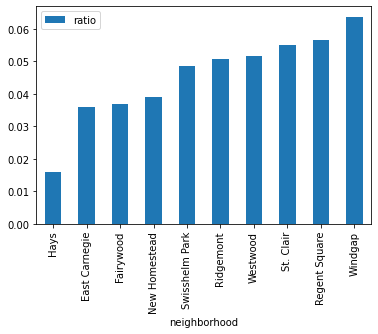

In [9]:
## analyze the ratio by bar plot, the top ten
plot = ratio.head(10).plot.bar(x='neighborhood', y='ratio')

### The last ten:

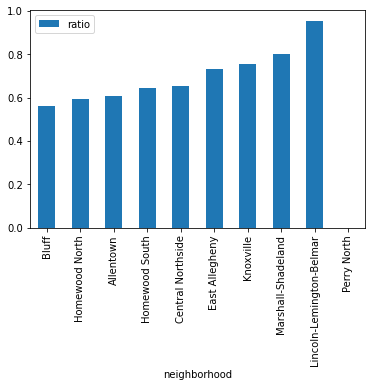

In [10]:
plot = ratio.tail(10).plot.bar(x='neighborhood', y='ratio')

### Create the map with the ratio data
### Plot out the neighborhood

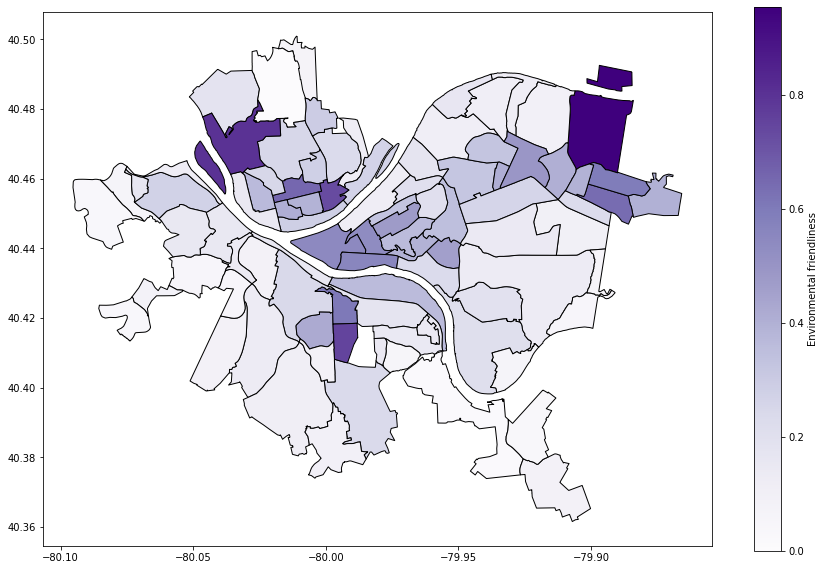

In [11]:
import geopandas
mapfile = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
firePlot = mapfile.merge(ratio, how = "left", left_on = "hood", right_on = "hood")
firePlot.plot(column='ratio', cmap='Purples',             
               edgecolor="black",        
               legend=True,              
               legend_kwds={'label': "Environmental friendliness"},
               figsize=(15, 10));

### From map above, the darkest color means the highest ratio, so the area with darkest color is Lincoln-Lemington-Belmar. It is the worst neighborhood base on the fire incidents data. The lightest colored is hays, the best neighborhood in Pittsburgh according to fire incidents data.

Conclusion

According to the ratio of acres/frequency, the best neighborhood in Pittsburgh where the least fire incidents happened is Hays. The worst neighborhood in pittsburgh where the most fire incidents happend is Lincoln-Lemington-Belmar. Because the fire incidents are related to the air quality, so the place has the least fire incidents are the best neighborhood in Pittsburgh. Hays is the best base on my individual metric. 
Overall, my individual work is to analyze where is the best/worst neighborhood base on the frequency/acres of fire incidents. I start by simply count the number of frequency of the neighborhood name, calculate the ratio using the area data, rank the ratio to get the best/worse neighborhood, finally use the map to plot out.